## Introduction

In this notebook we will develop a mathematical model representing the dynamics of a chemical reaction. Our description will be based on differential equations. We will learn how to specify them, and how to solve the resulting system using a numerical approach.

Our working example will be the Brusselator, a model first introduced in 1969 by the Belgian mathematician Ilya Prigogine. The model is a simplified representation of a chemical reaction that can exhibit complex patterns of behavior, such as oscillations and chaos. The Brusselator is named after the city of Brussels, where Prigogine was working at the time of its conception.

## Kinetic Equations

We will start with a short review of chemical equations, following [Ault and Holmgreen](https://www.bibliotecapleyades.net/archivos_pdf/brusselator.pdf). A chemical reaction is commonly written as follows:

$$ A + B \rightarrow C + D $$

The expression above represents a process in which one $A$ molecule and one $B$ are consumed to produce $C$ and $D$.

We assume that the systems follows the *law of mass action*, which states:

> The rate of the chemical reaction is directly proportional to the product of the activities or concentrations of the reactants.

Translating this law into a differential quation for $A$ is relatively easy:

$$ \frac{d \left[ A \right] }{dt} = - k_1 \left[ A \right] \left[ B \right] $$

In the expression above, $ \left[ A \right] $ denotes the concentration of that species. The right hand side of the equation has a negative sign because A is being consumed in the process. $k_1$ is called the *rate constant*
of the reaction: it gives the number of times that the reaction occurs in a volume at a given concentration. Finally, $ \left[ A \right] $ is multiplied by $ \left[ B \right] $ because the rate of the reaction depends on the concentration of both species.

To make our equations more compact, we are going to switch to the shorthand notation $ \dot{x} $, which simply represents $ d x / d t $. Hence:

$$ \dot{ \left[ A \right] } = - k_1 \left[ A \right] \left[ B \right] $$

Our entire kinetic consists of a single reaction. The rates can be trivially balanced:

$$ - \dot{ \left[ A \right] } = - \dot{ \left[ B \right] } = \dot{ \left[ C \right] } = \dot{ \left[ D \right] } = k_1 \left[ A \right] \left[ B \right] $$

To make the system more interesting, we should add a second chemical equation.

$$ 2 A \rightarrow 3 E $$

The main difference we have introduced lies in the presence of *stoichiometric coefficients* different from $1$. The equation states that two molecules of $A$ are required to produce $3$ molecules of $E$.

What's the consequence for the structure of the differential equations? Those for $B$, $C$ and $D$ won't change.

$$ - \dot{ \left[ B \right] } = \dot{ \left[ C \right] } = \dot{ \left[ D \right] } = k_1 \left[ A \right] \left[ B \right] $$

$E$ is a new species we didn't consider before. That calls for a new differential equation:

$$ \dot{E} = 3 k_2 \left[ A \right] ^2 $$

We also need to update the equation for $A$. Since this species is now involved in two separate reactionts, the right-hand side is going to be expressed as the sum of two terms.

$$ \dot{A} = - k_1 \left[ A \right] \left[ B \right] - 2 k_2 \left[ A \right] ^2 $$

## The Brusselator

Now that we have seen the basics involved with converting chemical equations into DEs, it is time to switch our attentions to the Brussellator model. Below are listed the relevant reactions:

$$ A \rightarrow X $$
$$ 2 X + Y \rightarrow 3 X $$
$$ B + X \rightarrow Y + D $$
$$ X \rightarrow E $$

Before moving on, try to derive the differential equations describing the kinetics of $X$ and $Y$. You can assume hat $A$ and $B$ are present in large amounts, so their concentrations remain constant. To simplify the equations further, set all rate constants to $1$.

$$
\begin{split}
\dot{ \left[ X \right] } & = \left[ A \right] + \left[ X \right] ^2 \left[ Y \right] - \left[ B \right] \left[ X \right] - \left[ X \right] \\
\dot{ \left[ Y \right] } & = - \left[ X \right] ^2 \left[ Y \right] + \left[ B \right] \left[ X \right]
\end{split}
$$

The description of the system is relatively simple: it only involves two time-varying variables, $X$ and $Y$. Nonetheless, it is quite hard to find an analytical solution. See [Alfifi](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/CFEFAC24AC7FA09A2AE9DC05112839F8/S1446181117000311a.pdf/semi-analytical-solutions-for-the-brusselator-reactiondiffusion-model.pdf), for instance, for some recent theoretical results.

Here we are going to take an alternative approach, that of numerical integration. While this provides only an approximated solution, it leverages the speed of modern CPUs to sidestep the theoretical analysis.

To set up the integration, we need to fix the initial conditions to some numerical values. We set:

$$
\begin{split}
A & = 1 \\
B & = 1.5 \\
X(0) & = 1 \\
Y(0) & = 1
\end{split}
$$

Note the difference among $A$ and $B$, and $X$ and $Y$. Since $A$ and $B$ are extremely abundant, we assume that their concentration does not change. We thus transform their (time-dependent) variables into constants. We set from the start their abundance for entire duration of the experiment.

Our handling of $X$ an $Y$ is different. We need to define their initial conditions, that is their abundances at $t = 0$. Other than that, we leave the evolution of both variables to evolve as dictated by the DEs.

Having attended to our mathematical duties, we can now switch to Python. We will start by writing a function representing the differential equations.

In [1]:
def brusselator(vs, t):
    x_t, y_t = vs
    a = 1
    b = 1.5
    
    xp_t = a + x_t**2 * y_t - b * x_t - x_t
    yp_t = - x_t**2 * y_t + b * x_t
    
    return [xp_t, yp_t]

The `brusselator` function will be invoked for every (simulated) point in time. It will receive the current abundances of both species, $X$ and $Y$, stored in a single list. That's why at **line 2** we unpack them, and give them distinct names.

(If you don't see the line numbers in the cell above, activate their display through the menu "View -> Toggle Line Numbers".)

**Lines 6 and 7** encode the kinetic of our system. They provide a direct transliteration of the origina DEs into Python code.

Similarly to what happened with the input, we store the values of all the derivatives in a single list (**line 9**). That will be the return value of the function.

In [2]:
import numpy as np

ts = np.linspace(0, 30, 1000)
ts[:10]

array([0.        , 0.03003003, 0.06006006, 0.09009009, 0.12012012,
       0.15015015, 0.18018018, 0.21021021, 0.24024024, 0.27027027])

We used the  [Numpy](https://numpy.org/) function `linspace` to define the time range over which we intend to study the system. Mathematically, we are  interested in the range $\left[ 0, 30 \right]$. Numerically, we also need to decide how many intermediate time points we should consider. The more we take, the better the accuracy of the simulation; but with large numbers also come a longer run time. We strike a balance by choosing $1000$ intermediate points.

The only remaining details are the initial conditions for $X$ and $Y$. We already discussed we intend them both to start with a concentration of $1$.

In [3]:
init = (1, 1)

We are not going to implement numerical integration ourselves. That would be quite a complicated programming task. Besides, there are established Python libraries already offering the right tools for the job: one notable example is [Scipy](https://scipy.org/).

In [4]:
from scipy.integrate import odeint

`odeint` is an abbreviation for "ODE integrator". You can find its manual [at this page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html). Give that a quick read, and try to understand what are the first three parameters that the function accepts. The remaining ones are not strictly required, and we won't be using them here.

In [5]:
solution = odeint(brusselator, init, ts)

The cell above invokes `odeint`, providing it with all the details regarding the Brusselator.

The solution that is returned to us consists in a matrix with two columns, representing the two variables, and as many rows as the timepoints we selected. In other terms, the matrix encodes a *trace* of the history of the system, measuring the abundances of the two species $X$ and $Y$ as time goes from $t=0$ to $30$.

In [6]:
solution.shape

(1000, 2)

We can observe the values in the first few rows, but they are not particularly easy to interpret in this form.

In [7]:
solution[:5]

array([[1.        , 1.        ],
       [0.9853182 , 1.01490393],
       [0.97128336, 1.02959198],
       [0.9578678 , 1.04407286],
       [0.94504541, 1.05835446]])

A much better approach would be to make a plot. Let's import [Matplolib](https://matplotlib.org/).

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Below we render two separate curves for the two species. We add a label to each curve in order to reference them in the legend.

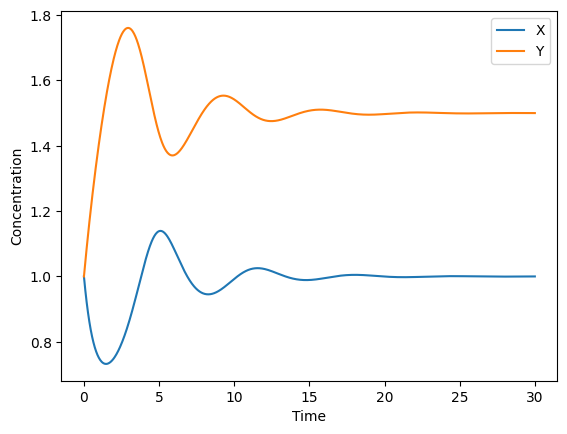

In [9]:
fig, ax = plt.subplots()
ax.plot(ts, solution[:,0], label="X")
ax.plot(ts, solution[:,1], label="Y")

ax.set_xlabel("Time")
ax.set_ylabel("Concentration")
ax.legend()
plt.show()

$X$ and $Y$ change rapidly their concentration, and then fluctuate a bit. Eventually, they stabilize around the concentration of, respectively, $1$ and $1.5$. This appears like a state of equilibrium for the systems.

## Steady State

The condition we have reached is called a *steady state*. The steady state of a dynamic system is a condition where the system's behavior does not change over time. In other words, it is a stable equilibrium where the system's inputs and outputs remain constant, and the system's internal behavior is predictable and consistent. In a steady state, the system's behavior is in balance, with no net change in the system's overall state.

Since that is such a notable condition, is there any other approach we could have used to identify it? In the case of the Brusselator, the answer is "yes".

We start by observing that the definition of the steady state implies that the concentrations don't change over time. If we go back to our differential equations, that would correspond to setting their left-hand sides (the derivatives) to zero.

$$
\begin{split}
0 & = \left[ A \right] + \left[ X \right] ^2 \left[ Y \right] - \left[ B \right] \left[ X \right] - \left[ X \right] \\
0 & = - \left[ X \right] ^2 \left[ Y \right] + \left[ B \right] \left[ X \right]
\end{split}
$$

What we have now is a set of two algebraic equations: finding an analytical solution is not complicated. We can do that with pen and paper, or we might ask [Wolfram Alpha](https://www.wolframalpha.com/):

> Solve 0 == a + x^2 y - b x - x, 0 == -x^2 y + b x

The only non trivial configuration is thus:

$$
\begin{split}
X & = A & = 1\\
Y & = \frac{B}{A} & = 1.5
\end{split}
$$

Notice how the above defines an entire family of solutions. As long as $A \neq 0$, we can predict the equilibrium state from $A$ and $B$ alone.

Say we start from a different condition of the system, $X(0) = 2$ and $Y(0) = 4$. The configuration the Brusselator evolves to remains the same as before. Indeed, we haven't changed neither $A$ nor $B$.

In [10]:
solution2 = odeint(brusselator, (2, 4), ts)

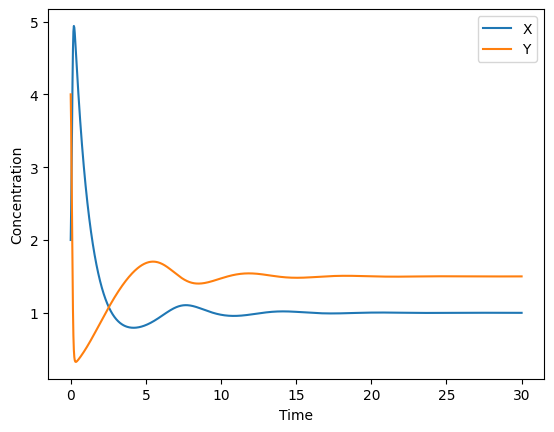

In [11]:
fig, ax = plt.subplots()
ax.plot(ts, solution2[:,0], label="X")
ax.plot(ts, solution2[:,1], label="Y")

ax.set_xlabel("Time")
ax.set_ylabel("Concentration")
ax.legend()
plt.show()

Case closed? Well, not so fast...

## Unstable States

To confirm our findings, let's consider one more scenario. I will set $A = 1$ and $B = 3$.

By the analysis done above, the corresponding steady state would be:

$$
\begin{split}
X & = A & = 1\\
Y & = \frac{B}{A} & = 3
\end{split}
$$

We resort to `odeint` once more to simulate this condition.

In [10]:
def brusselator2(vs, t):
    x_t, y_t = vs
    a = 1
    b = 3
    
    xp_t = a + x_t**2 * y_t - b * x_t - x_t
    yp_t = - x_t**2 * y_t + b * x_t
    
    return [xp_t, yp_t]

solution3 = odeint(brusselator2, init, ts)

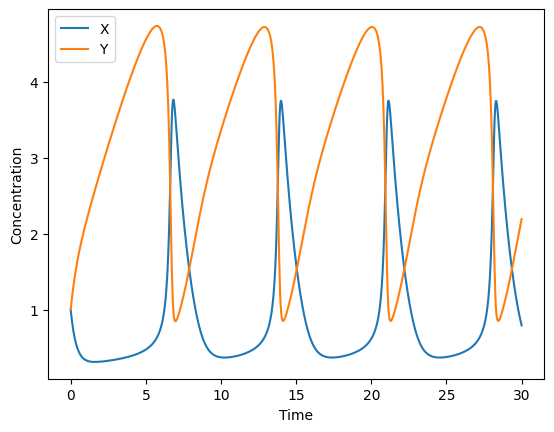

In [11]:
fig, ax = plt.subplots()
ax.plot(ts, solution3[:,0], label="X")
ax.plot(ts, solution3[:,1], label="Y")

ax.set_xlabel("Time")
ax.set_ylabel("Concentration")
ax.legend()
plt.show()

What is happening here? We were expecting the Brusselator to eventually reach a new steady state, but it's not what we are observing. Was our derivation above completely wrong?

Luckily, that's not the case. Consider this: instead of starting from the initial conditions $X(0) = 1$, $Y(0) = 1$ let's focus on $X(0) = 1$, $Y(0) = 3$.

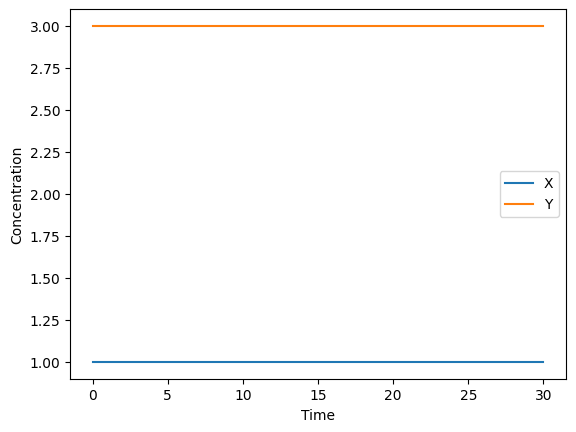

In [12]:
solution4 = odeint(brusselator2, (1, 3), ts)

fig, ax = plt.subplots()
ax.plot(ts, solution4[:,0], label="X")
ax.plot(ts, solution4[:,1], label="Y")

ax.set_xlabel("Time")
ax.set_ylabel("Concentration")
ax.legend()
plt.show()

The system became "well behaved" once more. It started in $(1, 3)$ and remained in that configuration for the entire duration of the experiment. That signals that indeed $(1, 3)$ is a steady state.

The reason for this apparent paradox is that there are really two different kinds of steady states: **stable** and **unstable** ones. The key difference between them is their response to perturbations or disturbances.

A stable steady state is a state where the system's behavior returns to its original state after a small perturbation. In other words, if the system is slightly displaced from its steady state, it will eventually return to the same state without any further input or intervention.

On the other hand, an unstable steady state is a state where even a small perturbation is sufficient to move the system away from its original state. If the system is slightly displaced from its steady state, it will continue to move further away from the steady state, leading to a new equilibrium point or a new behavior pattern.

The choice $A = 1$, $B = 3$ leads to the unstable steady state $X = 1$, $Y = 3$. Notice how the oscillations in the two variables do not dampen out for larger values of $t$. Indeed the Brusselator takes his name not only from the city of Brussels, but also from the oscillations that characterize its dynamic.

A different plot might be helpful to appreciate what is happening.

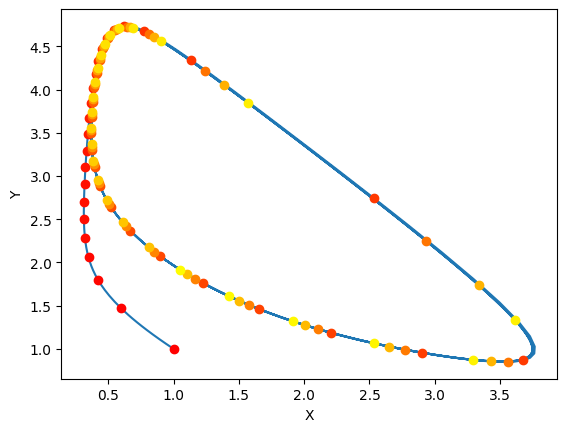

In [23]:
fig, ax = plt.subplots()
ax.plot(solution3[:,0], solution3[:,1])

cm = plt.get_cmap("autumn")
for i in range(0, 1000, 10):
    ax.plot(solution3[i,0], solution3[i,1], "o", c=cm(i/1000))

ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

Instead of plotting the variables $X$ and $Y$ separately, here we used them together to define the $x, y$ coordinates of a single curve. As a result, time $t$ is no longer represented explicitly.

I've added a colored dot to highlight every 10th point in the curve. They follow a color gradient starting from the red and ending in yellow: you can use this graphical attribute to guide your eyes.

The simulation starts at coordinates $1, 1$ (red dot in the lower-left corner). $X$ tends to decrease (corresponding to a movement to the left), while $Y$ increases (movement up). After an initial period of adjustment, the system enters into a cycle that is crossed multiple times. Notice like there are streaks of points with different colors next to each other: they represent multiple passes over the same regions.

While this behavior is in a certain sensa stable, because it repeats itself, it cannot be considered a steady state. Indeed both $X$ and $Y$ keep changing! This is called a **limit cycle**, and it's a kind of trajectory  exhibited in some nonlinear systems. Limit cycles have been used to model the behavior of many real-world oscillatory systems.